# По многочиленным просьбам ленивых

In [1]:
import os
import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms

from LookGenerator.networks.segmentation import UNet, train_unet
from LookGenerator.networks.utils import load_model
import LookGenerator.datasets.transforms as custom_transforms


In [7]:
model = UNet(in_channels=3, out_channels = 12, features=(16, 32, 64, 128, 256, 512))
transform_input = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.25, 0.25, 0.25]
    )
])

transform_output = transforms.Compose([
    transforms.Resize((256, 192)),
    custom_transforms.MinMaxScale(),
    custom_transforms.ThresholdTransform(threshold=0.5)
])


In [8]:
topil = transforms.ToPILImage()
totensor = transforms.ToTensor()

In [53]:
image = Image.open(r"C:\Users\DenisovDmitrii\Desktop\12channels\valData\image_2023-05-31_13-07-55.png")
img_model = transforms.ToTensor()(image)
img_model = img_model.unsqueeze(0)
img_model = transform_input(img_model)

C:\Users\DenisovDmitrii\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 3, 256, 192])


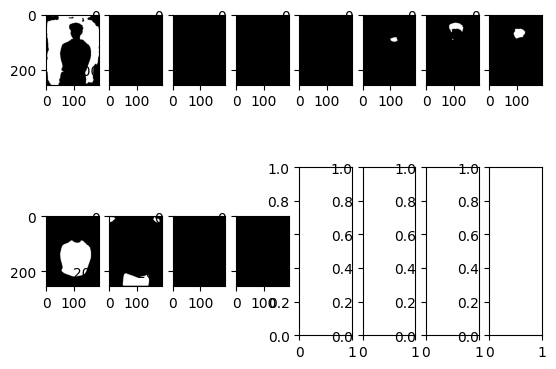

In [54]:
url = r'C:\Users\DenisovDmitrii\OneDrive - ITMO UNIVERSITY\peopleDetector\segmentationMulty\weights\testMulty_out_12_6features'
list_files = os.listdir(url)
print(img_model.shape)
for file in list_files[29:]:
    model = load_model(model,
                       url + "\\" + file)
    model.eval()
    modelled = model(img_model)
    modelled = transform_output(modelled)
    modelled = modelled.squeeze(0)

    # plotting

    fig, axes = plt.subplots(2, 8)

    for i in range(0, 8):
        mask = modelled[i]
        mask = topil(mask)
        mask = np.array(mask)

        axes[0,i].imshow(mask, cmap='gray')

    for i in range(8, 12):
        mask = modelled[i]
        mask = topil(mask)
        mask = np.array(mask)

        axes[1, i % 8].imshow(mask, cmap='gray')

plt.show()

In [6]:
list_files

['epoch_000.pt',
 'epoch_01.pt',
 'epoch_02.pt',
 'epoch_03.pt',
 'epoch_04.pt',
 'epoch_05.pt',
 'epoch_06.pt',
 'epoch_07.pt',
 'epoch_08.pt',
 'epoch_09.pt',
 'epoch_10.pt',
 'epoch_11.pt',
 'epoch_12.pt',
 'epoch_13.pt',
 'epoch_14.pt',
 'epoch_15.pt',
 'epoch_16.pt',
 'epoch_17.pt',
 'epoch_18.pt',
 'epoch_19.pt',
 'epoch_20.pt',
 'epoch_21.pt',
 'epoch_22.pt',
 'epoch_23.pt',
 'epoch_24.pt',
 'epoch_25.pt',
 'epoch_26.pt',
 'epoch_27.pt',
 'epoch_28.pt',
 'epoch_29.pt']